# Problem Set 1, due September 3rd at 11:59pm 

This problem set is meant to help you familiarize yourself with Python and Pandas. This is meant to be a very gentle introduction -- if you find this problem set to be difficult, you might want to consider taking a more introductory course.

### Before You Start
For this problem set, you should download INF0251-PS1.ipynb from bCourses. Create a local copy of the notebook and rename it LASTNAME_FIRSTNAME-PS1.ipynb. Then edit your renamed file directly in your browser by typing:
```
jupyter notebook <name_of_downloaded_file>
```

Make sure the following libraries load correctly (hit Ctrl-Enter).


In [1]:
#IPython is what you are using now to run the notebook
import IPython
print("IPython version:      %6.6s (need at least 1.0)" % IPython.__version__)

# Numpy is a library for working with Arrays
import numpy as np
print("Numpy version:        %6.6s (need at least 1.7.1)" % np.__version__)

# SciPy implements many different numerical algorithms
import scipy as sp
print("SciPy version:        %6.6s (need at least 0.12.0)" % sp.__version__)

# Pandas makes working with data tables easier
import pandas as pd
print("Pandas version:       %6.6s (need at least 0.11.0)" % pd.__version__)

# Module for plotting
import matplotlib
print("Maplotlib version:    %6.6s (need at least 1.2.1)" % matplotlib.__version__)

# SciKit Learn implements several Machine Learning algorithms
import sklearn
print("Scikit-Learn version: %6.6s (need at least 0.13.1)" % sklearn.__version__)

IPython version:       6.5.0 (need at least 1.0)
Numpy version:        1.15.0 (need at least 1.7.1)
SciPy version:         1.1.0 (need at least 0.12.0)
Pandas version:       0.23.4 (need at least 0.11.0)
Maplotlib version:     2.2.3 (need at least 1.2.1)
Scikit-Learn version: 0.19.1 (need at least 0.13.1)


In [2]:
import matplotlib.pyplot as plt

### Working in a group?
List the names of other students with whom you worked on this problem set:
- Alexander James Sebastian Robson

---

## Introduction to the assignment

For this assignment, you will be using the [Boston Housing Prices Data Set](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names).  Please read about the dataset carefully before continuing -- it is worth investing a few minutes up front otherwise you are likely to be hopelessly confused! Also, if you're new to analyzing data in Python, please make sure to read the relevant readings linked to on Canvas before beginning, otherwise you'll be stabbing in the dark.

Use the following commands to load the dataset:

In [3]:
from sklearn.datasets import load_boston
bdata = load_boston()

The following commands will provide some basic information about the shape of the data:

In [4]:
print(bdata.keys())
print(bdata.feature_names)
print(bdata.data.shape)
print(bdata.target.shape)

# uncomment the following if you want to see a lengthy description of the dataset
# print(bdata.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
(506, 13)
(506,)


In [5]:
boston = pd.DataFrame(bdata.data)

In [6]:
boston.columns = bdata.feature_names[:]
print(boston.shape)

(506, 13)


---

## Part 1: Descriptive analysis

### 1.1: Explore the data

Let's dig into the data a bit to see what we're dealing with. The first thing to do is to make sure you understand how the data is organized, what the data types are, whether there is any missing data, and so forth. Get your bearings on your own, then answer the following questions.

 - 1.1.1: How many different variables are there in the dataset, and how many different observations?
 - 1.1.2: How many instances are classified as neighborhoods where the tract bounds the Charles River? 
 - 1.1.3: Show that dataset does not contain any missing values.
 - 1.1.4: Display the property tax rate in the 5 neighborhoods that have the highest median housing price.

#### 1.1.1

In [7]:
print('number of observations = ' + str(len(boston.index)))
print('number of variables    = ' + str(len(boston.columns)))

number of observations = 506
number of variables    = 13


#### 1.1.2

In [8]:
print('number of neighbourhoods where the tract bounds the Charles River = ' + str(len(boston[boston['CHAS']==1])))

number of neighbourhoods where the tract bounds the Charles River = 35


#### 1.1.3

In [9]:
print('Are there any missing values? ' + str(boston.isnull().values.any()))

Are there any missing values? False


#### 1.1.4

In [10]:
#add MEDV to the boston dataframe and sort
boston['MEDV'] = bdata.target
boston.sort_values('MEDV', ascending=False)[:25]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
283,0.01501,90.0,1.21,1.0,0.4010,7.923,24.8,5.8850,1.0,198.0,13.6,395.52,3.16,50.0
225,0.52693,0.0,6.20,0.0,0.5040,8.725,83.0,2.8944,8.0,307.0,17.4,382.00,4.63,50.0
369,5.66998,0.0,18.10,1.0,0.6310,6.683,96.8,1.3567,24.0,666.0,20.2,375.33,3.73,50.0
370,6.53876,0.0,18.10,1.0,0.6310,7.016,97.5,1.2024,24.0,666.0,20.2,392.05,2.96,50.0
371,9.23230,0.0,18.10,0.0,0.6310,6.216,100.0,1.1691,24.0,666.0,20.2,366.15,9.53,50.0
372,8.26725,0.0,18.10,1.0,0.6680,5.875,89.6,1.1296,24.0,666.0,20.2,347.88,8.88,50.0
186,0.05602,0.0,2.46,0.0,0.4880,7.831,53.6,3.1992,3.0,193.0,17.8,392.63,4.45,50.0
204,0.02009,95.0,2.68,0.0,0.4161,8.034,31.9,5.1180,4.0,224.0,14.7,390.55,2.88,50.0
257,0.61154,20.0,3.97,0.0,0.6470,8.704,86.9,1.8010,5.0,264.0,13.0,389.70,5.12,50.0
195,0.01381,80.0,0.46,0.0,0.4220,7.875,32.0,5.6484,4.0,255.0,14.4,394.23,2.97,50.0


> As we can see from the dataframe above, there are several neighbourhoods with the maximum median housing price value of \\$50,000. It seems unlikely that 16 neighbourhoods all have exactly the same median housing price, let alone the maximum median housing price in the dataset - perhaps the dataset caps median housing price at \\$50,000. In any case, neighbourhoods with this median housing price have a wide distribution of tax rates. Given the absence of any other information, below I show the distribution of the tax rate for all neighbourhoods with a median housing price of \\$50,000, followed by the tax rate for the next 4 highest median housing price neighbourhoods:

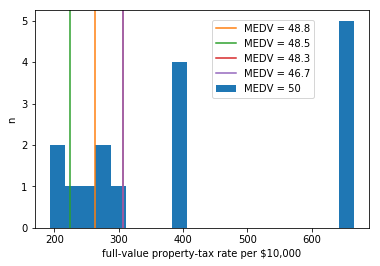

In [11]:
fig, ax = plt.subplots()

# the histogram
ax.hist(boston[boston['MEDV']==50]['TAX'], bins=20, label='MEDV = 50', color='C0')

# pull out the next 4 highest
next_4 = boston.sort_values('MEDV', ascending=False)
next_4 = next_4[next_4['MEDV']!=50][:4]
next_4.reset_index(drop=True,inplace=True)

# plot those as lines
colors = ['C1', 'C2', 'C3', 'C4']
for i in (range(len(next_4.index))):
    ax.axvline(next_4['TAX'][i], color=colors[i], label='MEDV = '+str(next_4['MEDV'][i]))

# make pretty
ax.legend(loc='upper right', bbox_to_anchor=(0.85, 0.98))
ax.set_xlabel('full-value property-tax rate per $10,000')
ax.set_ylabel('n')

plt.show(fig)

> We could also plot the median housing price vs. tax rate for all neighbourhoods included in the plot above:

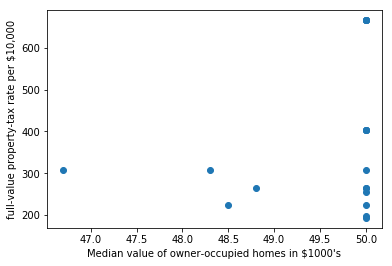

In [12]:
# pull out desired data
highest_5 = boston.sort_values('MEDV', ascending=False)
highest_5 = highest_5[:(len(highest_5[highest_5['MEDV']==50])+4)]

# plot
fig, ax = plt.subplots()

ax.scatter(highest_5['MEDV'], highest_5['TAX'])

ax.set_xlabel("Median value of owner-occupied homes in $1000's")
ax.set_ylabel('full-value property-tax rate per $10,000')

plt.show(fig)

### 1.2: Answer some basic questions
 - 1.2.1: What is the median housing price in Boston's most expensive neighborhood?
 - 1.2.2: How many neighborhoods have, on average, less than 5 rooms per dwelling?
 - 1.2.3: What is the property tax rate in the most expensive neighborhood that is also adjacent to the Charles River?
 - 1.2.4: What is the crime rate in the neighborhood with the highest median housing price? 
 - 1.2.5: What is the crime rate in the neighborhood with the lowest median housing price?

#### 1.2.1

> As discussed in **1.1.4**, the median housing price is \\$50,000 in Boston's most expensive neighbourhoods (of which there are 16).

#### 1.2.2

In [13]:
print('number of neighbourhoods with less than 5 rooms per dwelling on average = ' + str(len(boston[boston['RM']<5])))

number of neighbourhoods with less than 5 rooms per dwelling on average = 15


#### 1.2.3

In [14]:
boston[(boston['CHAS']==1) & (boston['MEDV']==np.max(boston['MEDV']))]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
162,1.83377,0.0,19.58,1.0,0.605,7.802,98.2,2.0407,5.0,403.0,14.7,389.61,1.92,50.0
163,1.51902,0.0,19.58,1.0,0.605,8.375,93.9,2.1620,5.0,403.0,14.7,388.45,3.32,50.0
283,0.01501,90.0,1.21,1.0,0.401,7.923,24.8,5.8850,1.0,198.0,13.6,395.52,3.16,50.0
369,5.66998,0.0,18.10,1.0,0.631,6.683,96.8,1.3567,24.0,666.0,20.2,375.33,3.73,50.0
370,6.53876,0.0,18.10,1.0,0.631,7.016,97.5,1.2024,24.0,666.0,20.2,392.05,2.96,50.0
372,8.26725,0.0,18.10,1.0,0.668,5.875,89.6,1.1296,24.0,666.0,20.2,347.88,8.88,50.0


> Again, there are multiple neighbourhoods (6) with the maximum median housing price value of \\$50,000 adjacent to the Charles River. We can again plot this as a histogram:

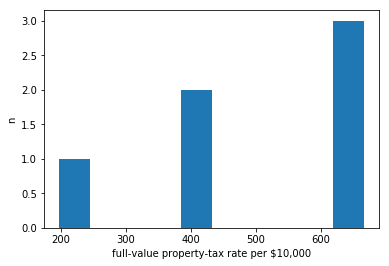

In [15]:
fig, ax = plt.subplots()

charles_highest = boston[(boston['CHAS']==1) & (boston['MEDV']==np.max(boston['MEDV']))]

ax.hist(charles_highest['TAX'])
ax.set_xlabel('full-value property-tax rate per $10,000')
ax.set_ylabel('n')

plt.show(fig)

#### 1.2.4

> Again, as a histogram:

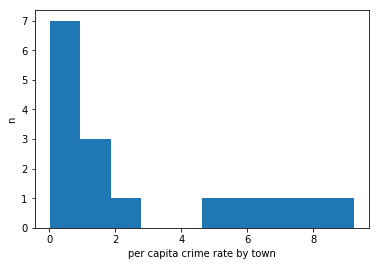

In [16]:
fig, ax = plt.subplots()

highest = boston[boston['MEDV']==np.max(boston['MEDV'])]

ax.hist(highest['CRIM'])
ax.set_xlabel('per capita crime rate by town')
ax.set_ylabel('n')

plt.show(fig)

#### 1.2.5

In [17]:
lowest = boston[boston['MEDV']==np.min(boston['MEDV'])]
lowest

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
398,38.3518,0.0,18.1,0.0,0.693,5.453,100.0,1.4896,24.0,666.0,20.2,396.90,30.59,5.0
405,67.9208,0.0,18.1,0.0,0.693,5.683,100.0,1.4254,24.0,666.0,20.2,384.97,22.98,5.0


> There are two neighbourhoods with the lowest median housing price of \\$5,000. Their per capita crime rates are:

In [18]:
print(lowest['CRIM'].values)

[38.3518 67.9208]


### 1.3: Summary statistics

Create a clean, organized table that shows just the following information (no more, no less) for each variable in the dataset. Note that your table should have K rows (one for each variable) and 7 columns, ordered as below:
 - The name of the variable
 - The number of observations with non-missing values
 - The mean of the variable
 - The standard deviation of the variable
 - The minimum value of the variable
 - The median of the variable
 - The maximum value of the variable

In [19]:
summary_stats = pd.DataFrame(columns=['name','number of observations','mean','standard deviation',
                                      'minimum','median','maximum'])

# iterate through columns
for i in range(len(boston.columns)):
    
    # compute/extract values
    name = boston.columns[i]
    n = boston[name].count()
    mean = np.mean(boston[name])
    std = np.std(boston[name])
    min = np.min(boston[name])
    med = np.median(boston[name])
    max = np.max(boston[name])
    
    # store values
    summary_stats.loc[i,'name'] = name
    summary_stats.loc[i,'number of observations'] = n
    summary_stats.loc[i,'mean'] = mean
    summary_stats.loc[i,'standard deviation'] = std
    summary_stats.loc[i,'minimum'] = min
    summary_stats.loc[i,'median'] = med
    summary_stats.loc[i,'maximum'] = max
    
summary_stats

,name,number of observations,mean,standard deviation,minimum,median,maximum
0,CRIM,506,3.59376,8.58828,0.00632,0.25651,88.9762
1,ZN,506,11.3636,23.2994,0,0,100
2,INDUS,506,11.1368,6.85357,0.46,9.69,27.74
3,CHAS,506,0.06917,0.253743,0,0,1
4,NOX,506,0.554695,0.115763,0.385,0.538,0.871
5,RM,506,6.28463,0.701923,3.561,6.2085,8.78
6,AGE,506,68.5749,28.121,2.9,77.5,100
7,DIS,506,3.79504,2.10363,1.1296,3.20745,12.1265
8,RAD,506,9.54941,8.69865,1,5,24
9,TAX,506,408.237,168.37,187,330,711


### 1.4 Simple statistical tests

Using a t-test, compare the median house value in locations that are adjacent to the Charles River to locations that are not adjacent to the Charles River. Do you reject the null hypothesis that prices are equivalent?

> First, just plot the data:

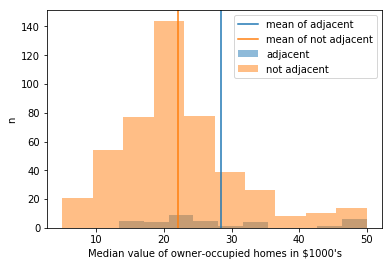

In [20]:
next_medv = boston[boston['CHAS']==1]['MEDV']
notnext_medv = boston[boston['CHAS']==0]['MEDV']

fig, ax = plt.subplots()

ax.hist(next_medv, alpha=0.5, label='adjacent', color='C0')
ax.hist(notnext_medv, alpha=0.5, label='not adjacent', color='C1')

ax.axvline(np.mean(next_medv), c='C0', label='mean of adjacent')
ax.axvline(np.mean(notnext_medv), c='C1', label='mean of not adjacent')

ax.set_xlabel("Median value of owner-occupied homes in $1000's")
ax.set_ylabel('n')
ax.legend()

plt.show(fig)

> Then compute the t-test without assuming an equal variance:

In [21]:
stat, pval = sp.stats.ttest_ind(next_medv, notnext_medv, equal_var=False)
print('statistic = ' + str(stat))
print('p value   = ' + str(pval))

statistic = 3.113291312794837
p value   = 0.003567170098137517


> The t-test outputs a very small p-value (much smaller than the typical threshold value of 0.05). We can therefore reject the null hypothesis of equal averages between the two samples. In other words, median house values are, in general, higher in neighbourhoods adjacent to the Charles River than those that are not.

---

## Part 2: Histograms and Scatterplots


### 2.1: Histogram of housing prices

Below you will find some very basic code to make a very basic histogram of median housing prices (the "target" variable) for your dataset.  Your first task is to make this graph look pretty by doing the following:

1. Add appropriate labels to the x and y axes, make sure to include units
2. Change the bin width on the histogram to be $1000
3. Remove the axes on the top and right side of the plot window
4. Change the color of the bars to be green, and remove the black borders from the bars


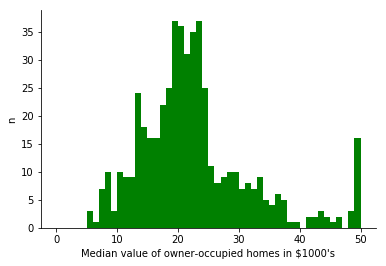

In [22]:
fig, ax = plt.subplots()

# set the bins
bins = np.arange(0,np.max(bdata.target)+1)

# make the histogram, changing the colour - black borders are off by default,
# so we do not need to add an argument for that
ax.hist(bdata.target, bins=bins, color='green')

# label axes
ax.set_xlabel("Median value of owner-occupied homes in $1000's")
ax.set_ylabel('n')

# remove the axes on the top and right side
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show(fig)

### 2.2: Scatter plot of housing prices and crime

Use matplotlib to create a scatter plot that shows the relationship between the median value of the home (y-axis) and the per-capita crime rate (x-axis).  Properly label your axes, and make sure that your graphic looks polished and professional.


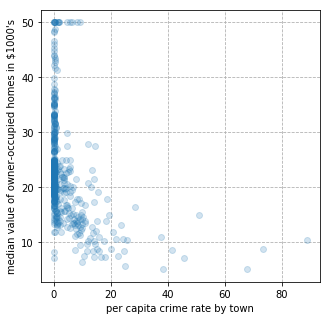

In [23]:
# make a square axis
fig, ax = plt.subplots(figsize=(5,5))

# scatter the data, making sure it stays on top of the grids.
# Also make the points semi-transparent to see high density areas of the plotting space
ax.scatter(boston['CRIM'], boston['MEDV'], zorder=99, alpha=0.2)

# label axes
ax.set_xlabel('per capita crime rate by town')
ax.set_ylabel("median value of owner-occupied homes in $1000's")

# grid
ax.grid(ls='--')

plt.show(fig)

### 2.3: Interpret

What do you observe in the above scatter plot? Does there appear to be a relationship between crime rates and housing prices in Boston? Calculate the correlation between these two variables. Do you think this relationship is causal, or just a correlation? Justify your position.

In [24]:
print('correlation coefficient = ' + str(sp.stats.stats.pearsonr(boston['CRIM'], boston['MEDV'])[0]))
print('p-value                 = ' + str(sp.stats.stats.pearsonr(boston['CRIM'], boston['MEDV'])[1]))

correlation coefficient = -0.3858316898839905
p-value                 = 2.0835501108141935e-19


> In the scatter plot, we observe that neighbourhoods with median home values greater than $\sim$\\$30,000 effectively have no crime (neglecting some strange behaviour at the maximum median home value, which is difficult to interpret without knowing more about why 16 neighbourhoods have this value, as discussed above). Below $\sim$\\$30,000, a few neighbourhoods start exhibiting relatively low crime rates. As median home values continue to decrease, more and more neighbourhoods have a non-negligible crime rate, and crime rate overall increases to higher and higher values. In neighbourhoods with the lowest median home values (<$\sim$\\$10,000), almost all neighbourhoods have medium to high crime rates.
>
> Therefore, overall, there does appear to be a negative correlation between median home values and crime rates in neihbourhoods in Boston. The correlation coefficient computed above confirms this correlation. Furthermore, the associated p-value is very low, suggesting that the correlation is statistically significant. However, the relationship is clearly non-linear, and an exponential fit would likely better capture the trends in the dataset.
>
> The relationship, however, is not causal. Motivation behind crime is an extremely complex social subject, but it is highly unlikely that lower house prices directly motivate crime. If this were true, it would imply that moving a wealthy person into poor neighbourhood would directly motivate the wealthy person to commit a crime - a rather unlikely scenario. Instead, crime is more likely a result of other factors, such as having an unreasonably low income, which can be correlated with lower house prices.

### 2.4 Correlation Matrix

Calculate the correlation of every pair of variables in the dataset. Create a *K* x *K* matrix where the value in the (*i*,*j*) cell is the correlation between the *i*th and *j*th variable. Show off your skills by coloring the cell so that large positive correlations appear green and large negative correlations appear red (use a gradient to make this pretty). What two variables appear to me most positively and negatively correlated?

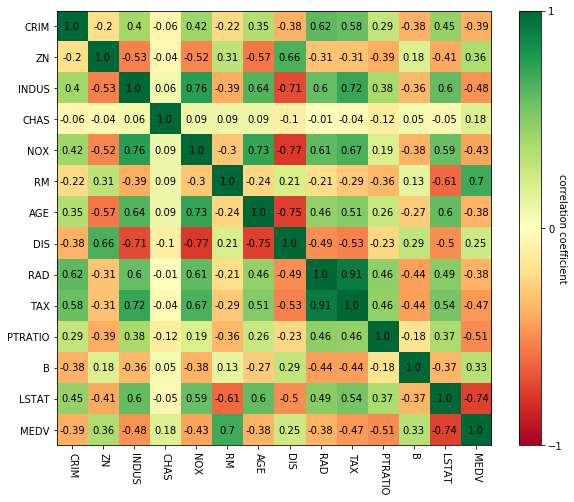

In [25]:
# calculate the correlation matrix
corr_mtx = np.corrcoef(np.transpose(boston.values))

fig, ax = plt.subplots(figsize=(10,8))

# plot the colours
cax = ax.imshow(corr_mtx, vmin=-1, vmax=1, cmap='RdYlGn')

# set the axis labels
ax.set_xticks(np.arange(0,len(boston.columns)))
ax.set_yticks(np.arange(0,len(boston.columns)))
ax.set_xticklabels(boston.columns, rotation=270)
ax.set_yticklabels(boston.columns)

# add the colorbar
cbar = fig.colorbar(cax, ticks=[-1, 0, 1])
cbar.ax.set_ylabel('correlation coefficient', rotation=270)

# add text for the values
for i in range(len(boston.columns)):
    for j in range(len(boston.columns)):
        ax.text(i, j, str(np.round(corr_mtx[i,j],2)),
                horizontalalignment='center', verticalalignment='center')

plt.show(fig)

> The highest correlation coefficient, by a significant margin, is between `RAD` (index of accessibility to radial highways) and `TAX` (full-value property-tax rate per \\$10,000). This correlation is strongly driven by a population of neighbourhoods (n = 132) all with `RAD` = 24 and `TAX` = 666:

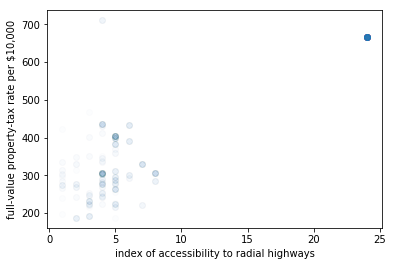

In [26]:
fig, ax = plt.subplots()

ax.scatter(boston['RAD'], boston['TAX'], alpha=0.01)
ax.set_xlabel('index of accessibility to radial highways')
ax.set_ylabel('full-value property-tax rate per $10,000')

plt.show(fig)

> Again, it is not clear why this strange population exists (perhaps for the same reasons that there are several neighbourhoods with the maximum median house value). However, if we assume the data is robust, then accessbility to transportation is a public service, and thus we may expect some correlation between these two variables. On the other hand, if we assume there is something strange with the data and remove this population, the correlation drops dramatically:

In [27]:
print('correlation coefficient = ' + str(sp.stats.stats.pearsonr(boston[boston['RAD']!=24]['RAD'],boston[boston['RAD']!=24]['TAX'])[0]))
print('p-value                 = ' + str(sp.stats.stats.pearsonr(boston[boston['RAD']!=24]['RAD'],boston[boston['RAD']!=24]['TAX'])[1]))

correlation coefficient = 0.18825618525667748
p-value                 = 0.0002509356183794466


> The next highest correlation coefficient is between `NOX` (nitric oxides concentration (parts per 10 million)) and `INDUS` (proportion of non-retail business acres per town). This correlation is much more expected - industry creates air pollution, so these two variables are expected to be strongly correlated.
>
> The lowest correlation coefficient is between `NOX` (nitric oxides concentration (parts per 10 million)) and `DIS` (weighted distances to five Boston employment centres). This result is again expected - highest pollution levels are often found near the city centres. Furthermore, `INDUS` has a strong negative correlation with `DIS`, which suggests that industry is concentrated near the city centres in Boston. Since `NOX` has a strong positive correlation with `INDUS`, this further explains the strong negative correlation between `NOX` and `DIS`.

### 2.5 Create your own (creative and effective) visualization

Use another type of graph or chart to illustrate an interesting pattern in the data.  Be creative in your visualization, and make sure to produce a "publication-quality" graph.  Points will be given for useful and creative graphs; points will be deducted for confusing issues like unlabeled axes.  If you're new to data visualization, [this guide](http://pubs.aeaweb.org/doi/pdfplus/10.1257/jep.28.1.209) is a good place to start.

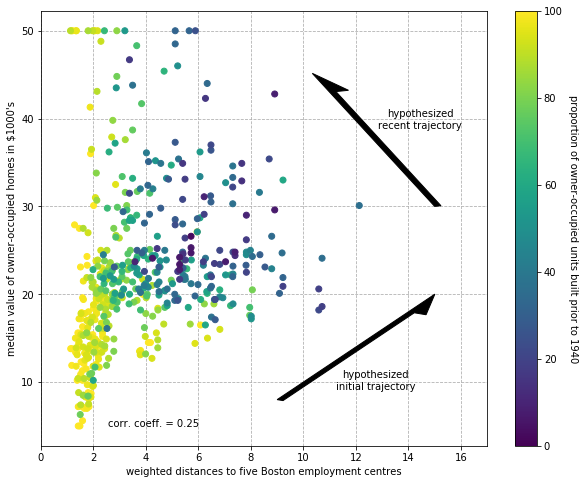

In [28]:
# sort to make sure the youngest neighbourhoods plot on top
sorted = boston.sort_values('AGE', ascending=False)

fig, ax = plt.subplots(figsize=(10,8))

# scatter the data, coloring by age
cax = ax.scatter(sorted['DIS'], sorted['MEDV'], c=sorted['AGE'], zorder=99, vmin=0, vmax=100)

# add the colorbar
cbar = fig.colorbar(cax)
cbar.ax.set_ylabel('proportion of owner-occupied units built prior to 1940', rotation=270, labelpad=15)

# label axes
ax.set_xlabel('weighted distances to five Boston employment centres')
ax.set_ylabel("median value of owner-occupied homes in $1000's")

# grid
ax.grid(ls='--')

# print correlation coefficient
ax.text(0.15,0.05,'corr. coeff. = ' + str(np.round(sp.stats.stats.pearsonr(boston['DIS'], boston['MEDV'])[0],2)),
        horizontalalignment='left', verticalalignment='center', transform=ax.transAxes)

# add the trajectory arrows
ax.set_xlim(0,17)
ax.arrow(9,8,5,10,width=0.5,shape='left',facecolor='k',zorder=99)
ax.text(0.75,0.15,'hypothesized\ninitial trajectory',
        horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
ax.arrow(15,30,-4,13,width=0.5,shape='left',facecolor='k',zorder=99)
ax.text(0.85,0.75,'hypothesized\nrecent trajectory',
        horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

plt.show(fig)

> It is often perceived that house prices are negatively correlated with distance from the city centre (i.e. it is expensive to live in the city). However, looking at the Boston dataset, we see that the opposite is closer to the truth - distance to employment centres is in fact positively correlated with median house price, implying that neighbourhoods further from the city centres are more expensive. Therefore, I hypothesized that the perception that house prices are negatively correlated with distance from the city centre is a modern one - i.e. that only in recent years has this negative correlation arisen, due to the evolving perception of the value of living in/near city centres.
>
> Above, I plot distance to employment centres vs. median house price, but colour map each data point to the proportion of owner-occupied units built prior to 1940 (with warmer colours representing older neighbourhoods). If my hypothesis were true, we would expect to see a positive correlation between distance to employment centres and median house price with the older neighbourhoods, but a negative correlation between these two variables with the younger neighbourhoods (as indicated by the arrows in the scatter plot). This pattern is not readily observed in the data. Instead, the initial trajectory generally persists to the youngest neighbourhoods, suggesting that migration of the wealthy into the city centres has not yet systematically taken place in Boston as of the date of publication of this data set.